In [ ]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the path to the dataset
dataset_path = r"O:\AI Programmer\To_Practice\6-11-2025\archive (9)\Rice_Image_Dataset"

In [ ]:
# Initialize empty lists for storing the images and labels
images = []
labels = []

In [60]:
# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    # Only process if it's an image file (assuming common image extensions)
    if os.path.isdir(subfolder_path):
        for image_filename in os.listdir(subfolder_path):
            if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                # Load the image and store it in the images list
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                
                # Store the label for the image in the labels list
                labels.append(subfolder)

In [61]:
# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [66]:
df.head(2)

,image,label
0,O:\AI Programmer\To_Practice\6-11-2025\archive...,Arborio
1,O:\AI Programmer\To_Practice\6-11-2025\archive...,Arborio


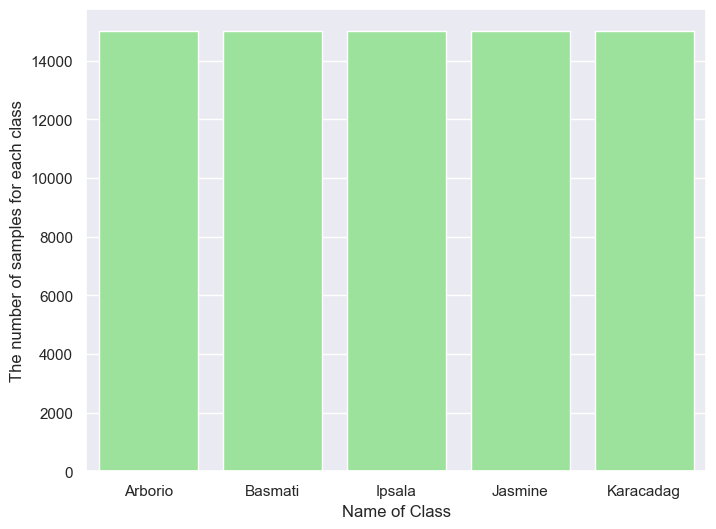

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.label, color='lightgreen')
plt.xlabel("Name of Class")
plt.ylabel("The number of samples for each class")
plt.show()

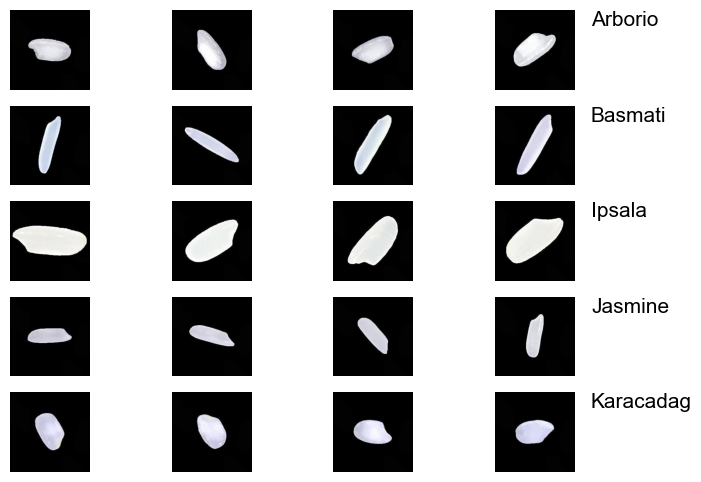

In [107]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 50, category, fontsize=15, color='black')

plt.show()

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.25, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

In [80]:
# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [81]:
# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 56250 validated image filenames belonging to 5 classes.


In [82]:
# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 18750 validated image filenames belonging to 5 classes.


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

In [84]:
# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [85]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# Train the model on the training data
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 412s 231ms/step - accuracy: 0.8449 - loss: 0.3879 - val_accuracy: 0.9319 - val_loss: 0.1904
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 304s 173ms/step - accuracy: 0.9423 - loss: 0.1576 - val_accuracy: 0.9550 - val_loss: 0.1263
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 236s 134ms/step - accuracy: 0.9579 - loss: 0.1175 - val_accuracy: 0.9770 - val_loss: 0.0662
Epoch 4/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 214s 122ms/step - accuracy: 0.9664 - loss: 0.0934 - val_accuracy: 0.9797 - val_loss: 0.0591
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 212s 121ms/step - accuracy: 0.9744 - loss: 0.0731 - val_accuracy: 0.9781 - val_loss: 0.0635


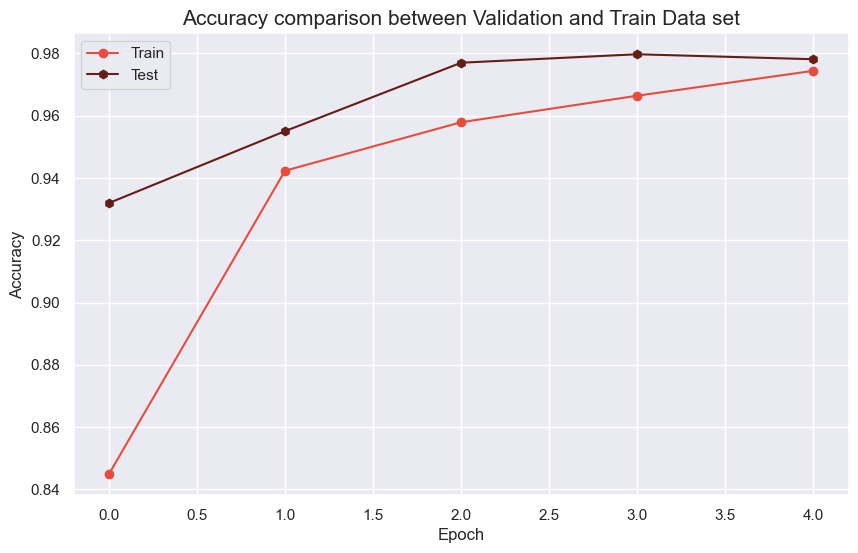

In [89]:
#Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

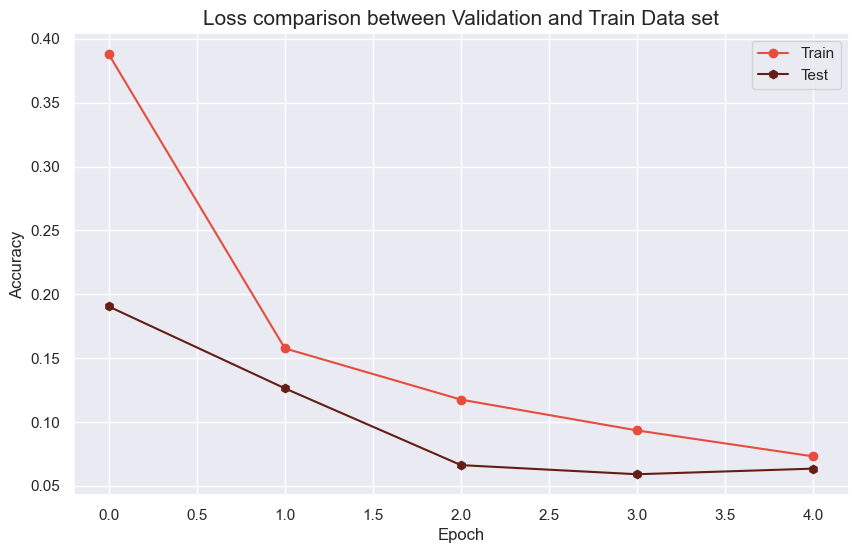

In [90]:
#Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [91]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

586/586 ━━━━━━━━━━━━━━━━━━━━ 46s 79ms/step - accuracy: 0.9775 - loss: 0.0616
Accuracy: 0.9774933457374573


In [92]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
